- in our original agenda this week we try different covariance estimation method
- but I think we'd better go directly to regression model
- then we can save some time for further more complicate machine learning models


- this week we focus on the most simple linear regression without regularization

In [4]:
from helper import *
from stats import *
from product_info import *
from imp import reload  
import helper
import stats
reload(helper)
reload(stats)
get_daily_pred


<function helper.get_daily_pred(file_name, product, signal_list, coef, strat, HEAD_PATH)>

In [5]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16

In [6]:
product_list = ["rb", "hc", "i", "j", "jm"]

In [7]:
period = 4096

In [8]:
all_dates = os.listdir(DATA_PATH + product_list[0])
all_dates.sort()
all_dates = np.array(all_dates)
n_days = len(all_dates)
n_days
## 915

915

In [9]:
import dask
from dask import compute, delayed
import sklearn.preprocessing

In [10]:
os.makedirs(HEAD_PATH+"/all signal", exist_ok=True)
dire_signal_list = ["trade.imb", "total.trade.imb", "nr", "dbook", "range.pos", "price.osci", "ma.dif.10", "kdj.k", "kdj.j"]
range_signal_list = ["", "range", "std", "volume.open.ratio", "trend.index"]
all_signal_list = np.array([])
for range_signal in range_signal_list:
    for dire_signal in dire_signal_list:
        if len(range_signal)==0:
            signal_name = dire_signal
        else:
            signal_name = dire_signal+"."+range_signal
        all_signal_list = np.append(all_signal_list,signal_name)
signal_list = [signal+".4096" for signal in all_signal_list]
n_signal = len(signal_list)

In [11]:
train_sample = all_dates<"2018"
test_sample = all_dates>"2018"
date_str = [n[0:8] for n in all_dates]
format_dates = np.array([pd.to_datetime(d) for d in date_str])

- let's begin with week 8

In [12]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import lasso_path, LassoCV
from sklearn.preprocessing import StandardScaler
y_signal = "ret."+str(period)+".002"



In [13]:
coef_list=dict([])
for product in product_list:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    x_train_normal = scaler.transform(x_train)
    model = LassoCV(n_alphas=100, fit_intercept=False, cv=5, max_iter=10000).fit(x_train_normal, y_train)
    coef = model.coef_/x_std
    print(product)
    print(coef)
    coef_list[product] = coef
    
# rb
# [ 0.00000000e+00  0.00000000e+00  1.46151781e-03 -0.00000000e+00
#   0.00000000e+00  1.19948774e-04  0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -1.17089646e-05  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -5.47280752e-05  0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -2.53119573e-02 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.40055353e-03
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00]
# hc
# [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -9.72938494e-05
#   0.00000000e+00  8.49286012e-05  0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -4.24714494e-05 -0.00000000e+00
#   0.00000000e+00 -4.75266625e-05 -0.00000000e+00  2.39447278e-04
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  1.12672499e-04 -1.09076025e-04 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -3.04748178e-02
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   5.38787461e-04  0.00000000e+00  2.33492521e-03 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#   3.23066767e-03  2.75108612e-04  0.00000000e+00  0.00000000e+00
#   0.00000000e+00]
# i
# [ 6.16585396e-03  0.00000000e+00  4.31578629e-04  4.34389078e-04
#  -0.00000000e+00  6.93773884e-04 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -2.53884434e-04 -0.00000000e+00
#   0.00000000e+00 -1.69604492e-04 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -1.27386213e-03 -0.00000000e+00
#  -0.00000000e+00 -2.67209310e-03 -0.00000000e+00 -0.00000000e+00
#  -3.82280516e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.38191983e-03
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  2.85735676e-03 -0.00000000e+00
#  -0.00000000e+00 -3.40377938e-05 -0.00000000e+00  6.04154454e-04
#  -0.00000000e+00]
# j
# [-6.64618626e-04 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  1.83706240e-04  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00  8.71352204e-05
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -1.17781790e-03 -0.00000000e+00
#   0.00000000e+00 -9.82199329e-04  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   1.06761075e-03  0.00000000e+00 -2.82892753e-04  0.00000000e+00
#   0.00000000e+00  1.71950324e-02  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#   5.19215094e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00]
# jm
# [-0.         -0.         -0.         -0.00087096 -0.         -0.
#  -0.0065562  -0.         -0.         -0.         -0.         -0.
#  -0.         -0.         -0.         -0.         -0.         -0.
#  -0.00024119 -0.         -0.         -0.00099405 -0.         -0.
#  -0.00050114 -0.         -0.         -0.         -0.         -0.
#  -0.         -0.         -0.         -0.05973195 -0.         -0.
#  -0.         -0.          0.         -0.         -0.         -0.
#  -0.         -0.         -0.        ]

rb
[ 0.00000000e+00  0.00000000e+00  1.46151781e-03 -0.00000000e+00
  0.00000000e+00  1.19948774e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.17089646e-05  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -5.47280752e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -2.53119573e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.40055353e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00]
hc
[-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -9.72938494e-05
  0.00000000e+00  8.49286012e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -4.24714494e-05 -0.00000000e+00
  0.00000000e+00 -4.75266625e-05 -0.00000000e+00  2.39447278e-04
 

In [15]:
strat = "lasso.002."+str(period)
for product in product_list:
    os.makedirs(HEAD_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [16]:
os.makedirs(HEAD_PATH+"/signal mat pkl", exist_ok=True)
for product in product_list:
    os.makedirs(HEAD_PATH+"/signal mat pkl/"+product, exist_ok=True)

In [42]:
def par_get_signal_mat(file_name, product, signal_list, HEAD_PATH):
    data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file_name)
    signal_mat = functools.reduce(functools.partial(get_signal_mat, product=product, file_name=file_name), signal_list, None)
    save(signal_mat, HEAD_PATH+"/signal mat pkl/"+product+"/"+file_name)

In [18]:
%%time
for product in product_list:
    print(product)
    parLapply(CORE_NUM, all_dates, par_get_signal_mat, 
              product=product, signal_list=signal_list, HEAD_PATH=HEAD_PATH)
    
# rb
# hc
# i
# j
# jm
# Wall time: 2h 21min 34s

    

rb
hc
i
j
jm
Wall time: 2h 21min 34s


In [44]:
def par_get_daily_pred(file_name, product, coef, strat, HEAD_PATH):
    signal_mat = load(HEAD_PATH+"/signal mat pkl/"+product+"/"+file_name)
    S = np.dot(signal_mat.transpose(),coef)
    save(S, HEAD_PATH+"/tmp pkl/"+product+"/"+strat+"/"+file_name)      


In [19]:
%%time
for product in product_list:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")

['rb', 'hc', 'i', 'j', 'jm']

In [19]:
def par_get_all_signal(signal_name, file_list, product, period, HEAD_PATH="d:/intern"):
    n_files = len(file_list)
    all_signal = np.array([])
    for file in file_list:
        S = load(HEAD_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
        #data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
        good = load(HEAD_PATH+"/good pkl/"+product+"/"+file)
        signal = S[good]
        chosen = (np.arange(len(signal))+1) % period==0
        all_signal = np.concatenate((all_signal, signal[chosen]), axis=0)
    save(all_signal, HEAD_PATH+"/all signal/"+product+"."+signal_name+".pkl")


In [20]:
%%time
for product in product_list:
    par_get_all_signal(strat, all_dates, product, 4096, HEAD_PATH="e:/intern")
    
# Wall time: 59.6 s

Wall time: 59.6 s


In [22]:
%%time
for product in product_list:
    spread = product_info[product]["spread"]
    evaluate_signal("lasso.002", all_dates, product, 2, 20, HEAD_PATH, 
                    CORE_NUM, period=4096, split_str="2018", tranct=1.1e-4, 
                    max_spread=spread+0.1, tranct_ratio=True, atr_filter=20, save_path="signal result atr",reverse=1)
# reverse=1
# reverse=1
# reverse=1

# Wall time: 3min 8s

reverse=1
reverse=1
reverse=1
reverse=1
reverse=1
Wall time: 10min 51s


rb train sharpe  2.204322309825338 test sharpe  1.2972262253364206
hc train sharpe  1.4625173163029064 test sharpe  0.26773784783357013
i train sharpe  1.0578039802590233 test sharpe  0.7404904012321055
j train sharpe  0.6100507159879063 test sharpe  -0.4673255998299031
jm train sharpe  1.3829124479087864 test sharpe  1.7186449948558897
train sharpe:  2.4107119934607146 test sharpe:  0.812712468660879


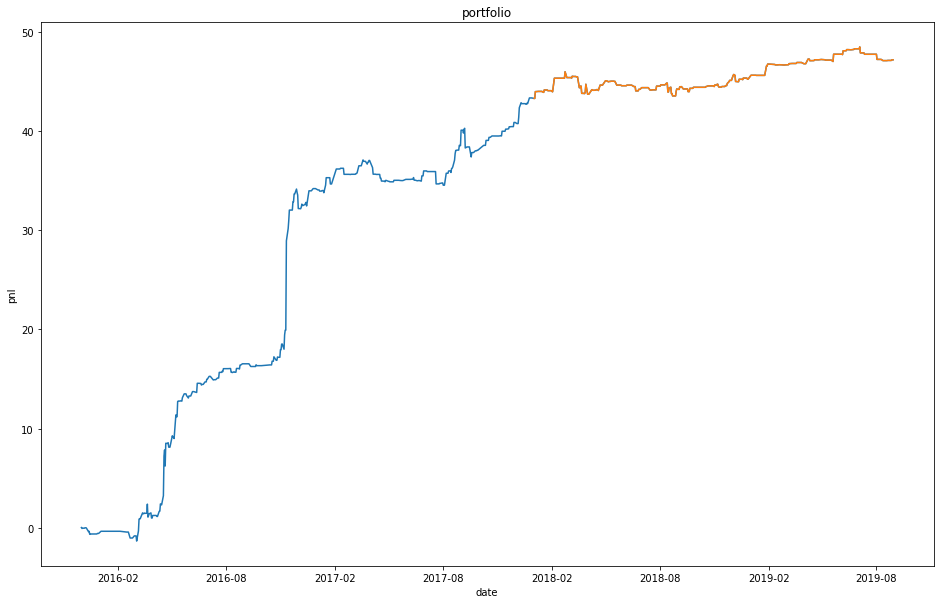

In [116]:
i = 0
strat = "lasso.002.4096"
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
min_pnl = 2
min_num = 10
for product in product_list:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    train_std = np.std(train_pnl)
    train_pnl = train_pnl/train_std
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)/train_std
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    
# rb train sharpe  2.204322309825338 test sharpe  1.2972262253364206
# hc train sharpe  1.4625173163029064 test sharpe  0.26773784783357013
# i train sharpe  1.0578039802590233 test sharpe  0.7404904012321055
# j train sharpe  0.6100507159879063 test sharpe  -0.4673255998299031
# jm train sharpe  1.3829124479087864 test sharpe  1.7186449948558897
# train sharpe:  2.4107119934607146 test sharpe:  0.812712468660879



- we can see that all but j are profitable
- now let's try ridge regression

In [35]:
strat = "ridge.002"+str(period)

In [52]:
for product in product_list:
    os.makedirs(HEAD_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [37]:
from sklearn.linear_model import RidgeCV

In [39]:
coef_list=dict([])
for product in product_list:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    x_train_normal = scaler.transform(x_train)
    model = RidgeCV(fit_intercept=False, cv=5).fit(x_train_normal, y_train)
    coef = model.coef_/x_std
    print(product)
    print(coef)
    coef_list[product] = coef

# rb
# [ 5.78488016e-03  3.01066134e-04  1.31568694e-02  5.22384390e-03
#   4.86311858e-03  3.29323967e-04 -1.76483596e-01  2.98322811e-04
#  -1.01752343e-03  1.01528107e-03 -1.99124064e-04  2.54655199e-04
#  -8.91265361e-04  1.51266560e-05  1.32088607e-05 -4.26001830e-04
#  -5.26020772e-06 -1.49048688e-05 -2.23104033e-03  4.20565823e-04
#  -6.51997001e-04  1.92752889e-03 -8.59942448e-04 -1.57513870e-05
#   5.48153784e-03 -6.00978543e-05  3.16062218e-04 -4.42957915e-02
#  -6.22781130e-03 -1.00393625e-03 -7.09026634e-03  1.20140842e-03
#   3.34280281e-03  5.09163139e-02  1.46947595e-03 -3.57791493e-03
#  -6.59399837e-03 -5.00678287e-04 -6.87673202e-03 -7.41229725e-03
#  -3.02919375e-03 -3.29127350e-04  2.55499530e-02 -6.30129722e-04
#   1.26501305e-03]
# hc
# [ 2.05245705e-02 -1.10540193e-02  1.85084075e-02 -1.89898797e-02
#   1.31480293e-03  4.24931882e-04  1.46507463e-02 -5.84237438e-04
#   2.88481220e-04  1.30261466e-04 -2.38589805e-04 -9.93787838e-04
#   4.95767067e-04 -1.78286857e-04 -6.31586274e-05  5.22484182e-03
#   2.39979936e-06  6.61132212e-05 -1.20656575e-03  8.00640050e-04
#   1.69267122e-03  1.44393435e-04 -2.96311704e-04  1.89056464e-04
#  -1.35221189e-02  2.78875461e-05 -6.01991886e-05 -6.15812625e-02
#   1.53486383e-02  1.10122917e-01 -2.90777711e-02  1.37446265e-02
#  -7.71985054e-04  1.71411650e-02  8.23034255e-03 -1.38166595e-02
#  -2.05274303e-02  1.48928731e-02 -3.56953534e-02  1.19780011e-02
#   1.19281570e-02  1.18088133e-03 -1.71261960e-01 -2.58949710e-04
#  -1.46630670e-03]
# i
# [ 1.11121249e-02  1.60181928e-03  5.26350483e-04  1.51936672e-04
#  -1.64353660e-03  2.09495974e-03  1.50849299e-02 -6.75407254e-04
#   7.06100030e-04  2.74195904e-03 -1.61644157e-03 -8.05307586e-04
#   2.74507747e-04 -6.47737099e-04  2.05222254e-04  3.14387254e-04
#   2.45881683e-04  2.21218233e-05 -1.27331506e-02  6.72819863e-03
#  -7.82174023e-04 -4.46374464e-03  1.96271539e-03 -1.49234685e-03
#  -1.36835389e-02 -6.11317669e-04 -1.66330598e-04 -8.51655448e-03
#   2.92858517e-03 -1.29461441e-02  6.24597530e-03 -2.01356324e-04
#  -2.64985634e-03  2.14807646e-01 -3.24614858e-03  2.84301403e-04
#  -8.59772716e-03 -8.53372322e-03  2.59166008e-02  8.60410827e-04
#  -8.91556805e-04 -1.88008023e-03  7.45153592e-02  2.64614079e-03
#  -1.48555810e-03]
# j
# [-3.56154078e-03 -1.54068821e-02  1.41423166e-02  2.05719225e-03
#   3.18141991e-04  6.86270191e-03 -3.12370379e-01 -1.12349841e-03
#  -1.59511676e-03  5.96442402e-04  4.42401133e-04  3.16631038e-04
#   4.67144788e-04 -1.45640522e-05  6.17077833e-05 -2.88295337e-03
#  -2.72115776e-06  3.71250332e-05 -4.11604211e-03 -1.33416356e-03
#   2.61856557e-03 -3.65250932e-03  5.55722490e-05 -6.35513790e-04
#   1.47741062e-02 -1.38680564e-05  1.42749580e-05  1.38377761e-02
#   1.15881118e-02  2.92925483e-02 -1.97333690e-02 -8.39603133e-03
#  -4.80865922e-03  2.78007886e-01 -3.34093176e-03  3.40647155e-03
#   3.44686539e-03  1.13612286e-02 -6.51739436e-02  1.01574347e-02
#   1.15150847e-02 -5.21661448e-03  2.04422405e-01  2.57776214e-03
#   5.00531590e-04]
# jm
# [ 4.63561573e-02 -1.87413443e-02  5.49106815e-02 -3.52336806e-02
#  -6.11878815e-04  1.13660183e-03 -9.97225653e-02 -9.46455473e-04
#  -1.31698496e-03 -1.10416025e-05  1.82243467e-04  4.10394277e-04
#   7.71738468e-04  1.57990640e-04  1.57120572e-04 -8.46544541e-04
#   2.75530193e-05 -2.73747730e-05 -2.57266650e-03 -3.05544563e-04
#   2.49987635e-03 -3.35212371e-03  5.54151380e-05 -5.49770417e-04
#  -3.95102864e-03 -2.93215780e-04  2.18408367e-04  5.50416166e-03
#   2.48239596e-02 -1.13010705e-01  1.76087812e-02 -4.54671948e-03
#  -4.48379862e-03 -1.96739346e-01  5.39252417e-03  6.61492022e-03
#  -5.82294221e-02  1.50423494e-02  8.46162490e-03  2.80569603e-02
#  -6.99255318e-03 -5.70063831e-04  5.14683962e-02  2.19361090e-04
#   1.67826106e-05]

rb
[ 5.78488016e-03  3.01066134e-04  1.31568694e-02  5.22384390e-03
  4.86311858e-03  3.29323967e-04 -1.76483596e-01  2.98322811e-04
 -1.01752343e-03  1.01528107e-03 -1.99124064e-04  2.54655199e-04
 -8.91265361e-04  1.51266560e-05  1.32088607e-05 -4.26001830e-04
 -5.26020772e-06 -1.49048688e-05 -2.23104033e-03  4.20565823e-04
 -6.51997001e-04  1.92752889e-03 -8.59942448e-04 -1.57513870e-05
  5.48153784e-03 -6.00978543e-05  3.16062218e-04 -4.42957915e-02
 -6.22781130e-03 -1.00393625e-03 -7.09026634e-03  1.20140842e-03
  3.34280281e-03  5.09163139e-02  1.46947595e-03 -3.57791493e-03
 -6.59399837e-03 -5.00678287e-04 -6.87673202e-03 -7.41229725e-03
 -3.02919375e-03 -3.29127350e-04  2.55499530e-02 -6.30129722e-04
  1.26501305e-03]
hc
[ 2.05245705e-02 -1.10540193e-02  1.85084075e-02 -1.89898797e-02
  1.31480293e-03  4.24931882e-04  1.46507463e-02 -5.84237438e-04
  2.88481220e-04  1.30261466e-04 -2.38589805e-04 -9.93787838e-04
  4.95767067e-04 -1.78286857e-04 -6.31586274e-05  5.22484182e-03
 

In [40]:
strat = "ridge.002."+str(period)
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [45]:
%%time
for product in product_list:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")
    
# rb
# hc
# i
# j
# jm
# Wall time: 26min 29s

rb
hc
i
j
jm
Wall time: 26min 29s


- we can see that for ridge we use all of the signals

In [46]:
%%time
for product in product_list:
    par_get_all_signal(strat, all_dates, product, 4096, HEAD_PATH="e:/intern")

Wall time: 1min 54s


In [48]:
%%time
for product in product_list:
    spread = product_info[product]["spread"]
    evaluate_signal("ridge.002", all_dates, product, 2, 20, HEAD_PATH, 
                    CORE_NUM, period=4096, split_str="2018", tranct=1.1e-4, 
                    max_spread=spread+0.1, tranct_ratio=True, atr_filter=20, save_path="signal result atr",reverse=1)

reverse=1
reverse=1
reverse=1
reverse=1
reverse=1
Wall time: 13min 26s


rb train sharpe  1.1290345204426433 test sharpe  0.21040399292482728
hc train sharpe  2.0907058083683556 test sharpe  0.22760096513589834
i train sharpe  1.305726106991769 test sharpe  0.6356950214482296
j train sharpe  1.0898424144470746 test sharpe  -0.6697161676577547
jm train sharpe  1.656746654377378 test sharpe  -2.03044129952892
train sharpe:  2.5285316820759767 test sharpe:  -0.7273905545346081


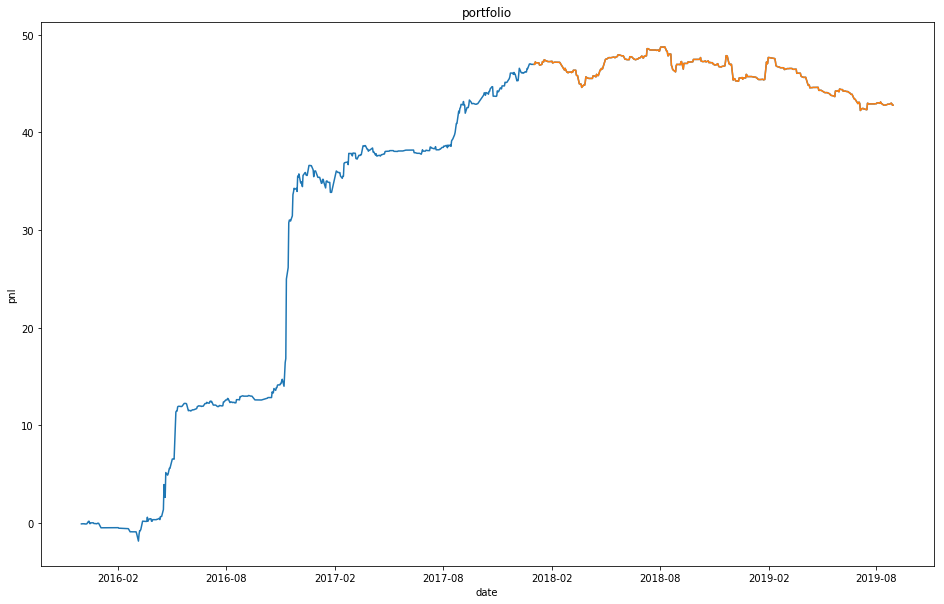

In [49]:
i = 0
strat = "ridge.002.4096"
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
min_pnl = 2
min_num = 10
for product in product_list:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    train_std = np.std(train_pnl)
    train_pnl = train_pnl/train_std
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)/train_std
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    

# rb train sharpe  1.1290345204426433 test sharpe  0.21040399292482728
# hc train sharpe  2.0907058083683556 test sharpe  0.22760096513589834
# i train sharpe  1.305726106991769 test sharpe  0.6356950214482296
# j train sharpe  1.0898424144470746 test sharpe  -0.6697161676577547
# jm train sharpe  1.656746654377378 test sharpe  -2.03044129952892
# train sharpe:  2.5285316820759767 test sharpe:  -0.7273905545346081




- It's worse than lasso

- maybe we can try elastic net

In [50]:
from sklearn.linear_model import ElasticNetCV

In [51]:
strat = "elastic.002."+str(period)

In [53]:
for product in product_list:
    os.makedirs(HEAD_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [55]:
coef_list=dict([])
for product in product_list:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    x_train_normal = scaler.transform(x_train)
    model = ElasticNetCV(n_alphas=100, l1_ratio=0.5, fit_intercept=False, cv=5, max_iter=10000).fit(x_train_normal, y_train)
    coef = model.coef_/x_std
    print(product)
    print(coef)
    coef_list[product] = coef


rb
[ 0.00000000e+00  0.00000000e+00  1.46138940e-03 -0.00000000e+00
  0.00000000e+00  1.19942263e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.17052591e-05  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -5.47284826e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -2.53081194e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.40145955e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00]
hc
[-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -9.74357143e-05
  0.00000000e+00  8.48757710e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -4.24734179e-05 -0.00000000e+00
  0.00000000e+00 -4.74717393e-05 -0.00000000e+00  2.39244868e-04
 

In [56]:
for product in product_list:
    os.makedirs(HEAD_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [57]:
%%time
for product in product_list:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")

# rb
# hc
# i
# j
# jm
# Wall time: 26min 45s


rb
hc
i
j
jm
Wall time: 26min 45s


In [58]:
%%time
for product in product_list:
    par_get_all_signal(strat, all_dates, product, 4096, HEAD_PATH="e:/intern")

Wall time: 1min 35s


In [60]:
%%time
for product in product_list:
    spread = product_info[product]["spread"]
    evaluate_signal("elastic.002", all_dates, product, 2, 20, HEAD_PATH, 
                    CORE_NUM, period=4096, split_str="2018", tranct=1.1e-4, 
                    max_spread=spread+0.1, tranct_ratio=True, atr_filter=20, save_path="signal result atr",reverse=1)

reverse=1
reverse=1
reverse=1
reverse=1
reverse=1
Wall time: 13min 1s


rb train sharpe  2.2045016518398075 test sharpe  1.3033843915519625
hc train sharpe  1.462908132265175 test sharpe  0.2682945785528859
i train sharpe  1.0578039802590233 test sharpe  0.7404904012321055
j train sharpe  0.6102247013395624 test sharpe  -0.4679164786251905
jm train sharpe  1.381665393610158 test sharpe  1.7186449948558942
train sharpe:  2.4107781976002425 test sharpe:  0.8145650577581276


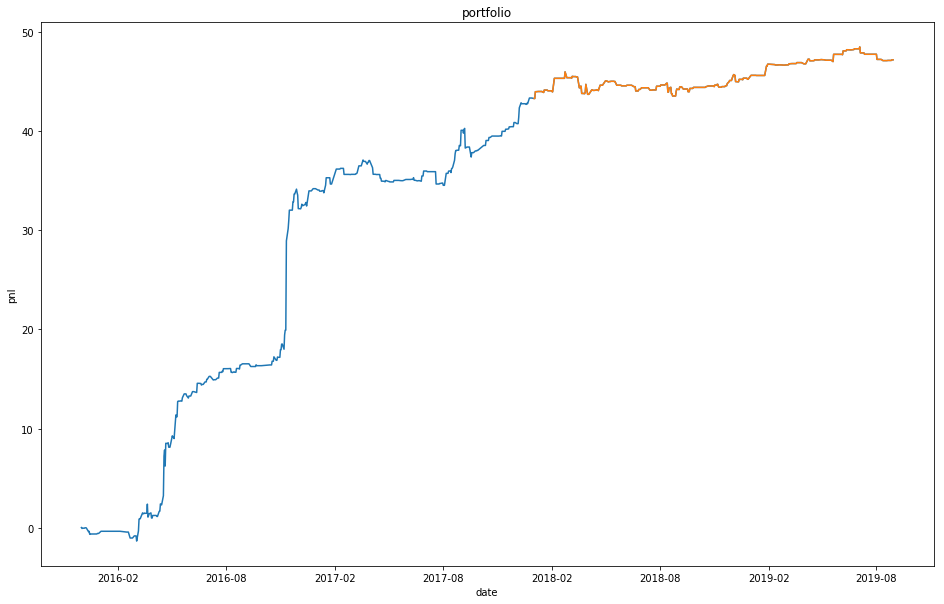

In [61]:
i = 0
strat = "elastic.002.4096"
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
min_pnl = 2
min_num = 10
for product in product_list:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    train_std = np.std(train_pnl)
    train_pnl = train_pnl/train_std
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)/train_std
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    

## elastic net
# rb train sharpe  2.2045016518398075 test sharpe  1.3033843915519625
# hc train sharpe  1.462908132265175 test sharpe  0.2682945785528859
# i train sharpe  1.0578039802590233 test sharpe  0.7404904012321055
# j train sharpe  0.6102247013395624 test sharpe  -0.4679164786251905
# jm train sharpe  1.381665393610158 test sharpe  1.7186449948558942
# train sharpe:  2.4107781976002425 test sharpe:  0.8145650577581276

## lasso
# rb train sharpe  2.204322309825338 test sharpe  1.2972262253364206
# hc train sharpe  1.4625173163029064 test sharpe  0.26773784783357013
# i train sharpe  1.0578039802590233 test sharpe  0.7404904012321055
# j train sharpe  0.6100507159879063 test sharpe  -0.4673255998299031
# jm train sharpe  1.3829124479087864 test sharpe  1.7186449948558897
# train sharpe:  2.4107119934607146 test sharpe:  0.812712468660879

- Now we can add another model - Adaptive Lasso
- Previously, the penalty for each coefficent is the same
- However, we can use different penalty for each coefficient, and that's adaptive lasso
- Python does not support adaptive lasso directly
- but we can derive the formula by ourselvs
- for example, people may use leat square regression or ridge to get the penalty
- usually it's (1/beta) for each coeffcient
- so we can simply multiple each x by 1/beta_i for each indicator i
- and then solve it by lasso
- in the end recover the coeffient


In [95]:
ridge_coef

array([ 2.06363111e-04,  2.20021237e-05,  4.02149831e-04,  2.78529786e-04,
        6.21889846e-04,  1.80414486e-04, -8.07806599e-04,  1.28956179e-04,
       -3.88282962e-04,  9.71717856e-04, -4.79041305e-04,  2.95521242e-04,
       -1.28150373e-03,  6.65722230e-05,  1.93433821e-04, -1.14880245e-04,
       -8.02759222e-05, -1.95939570e-04, -5.31515831e-04,  2.47183857e-04,
       -1.98136423e-04,  6.56289443e-04, -9.23222856e-04, -5.61447204e-05,
        3.70489216e-04, -2.30412270e-04,  1.03486451e-03, -3.55045837e-04,
       -1.10076084e-04, -8.08308207e-06, -8.07765954e-05,  4.28053086e-05,
        4.06325653e-04,  9.31158961e-05,  1.67768216e-04, -3.70091791e-04,
       -1.25211377e-04, -2.41693688e-05, -1.48814048e-04, -2.14262071e-04,
       -2.44056025e-04, -1.25535364e-04,  8.48781231e-05, -1.84683689e-04,
        3.11377849e-04])

In [98]:
x_std

array([2.60566308e-02, 6.63377693e-02, 1.93214523e-02, 3.49547910e-02,
       1.30414501e-01, 4.82087430e-01, 7.31232287e-03, 4.41420468e-01,
       3.84816056e-01, 5.02651905e-01, 1.45383658e+00, 4.60969980e-01,
       6.48605045e-01, 2.95423291e+00, 9.05887701e+00, 2.56750109e-01,
       1.05217162e+01, 9.05860524e+00, 1.24549790e-01, 3.66662599e-01,
       1.23126244e-01, 1.59800681e-01, 7.42777372e-01, 2.26220818e+00,
       6.80179079e-02, 2.67738069e+00, 2.29066963e+00, 7.42064038e-03,
       1.96040824e-02, 6.82408511e-03, 1.01846458e-02, 3.89474373e-02,
       1.22261609e-01, 2.61128031e-03, 1.25648311e-01, 1.12922016e-01,
       1.43150685e-02, 4.16182821e-02, 1.33740212e-02, 1.93433737e-02,
       7.86727458e-02, 3.26773573e-01, 4.93455306e-03, 2.86616420e-01,
       2.37111398e-01])

In [105]:
coef_list=dict([])
y_signal = "ret.4096.002"
for product in product_list:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    #scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    #scaler.fit(x_train)
    #x_std = np.sqrt(scaler.var_)
    #x_train_normal = scaler.transform(x_train)
    ridge_model = RidgeCV(fit_intercept=False, cv=5).fit(x_train, y_train)
    ridge_ceof = np.abs(ridge_model.coef_)
    model = LassoCV(n_alphas=100, fit_intercept=False, cv=5, max_iter=10000).fit(x_train/ridge_coef, y_train)
    coef = model.coef_/ridge_coef
    print(product)
    print(coef)
    coef_list[product] = coef
    
# rb
# [-0.00000000e+00  9.89672475e-04  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -4.12168955e-05  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  1.19966943e-02 -3.20567895e-02 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00]
# hc
# [-0.00000000e+00 -5.87094062e-03  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  3.59996206e-05  0.00000000e+00  2.23087882e-04
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -7.20970391e-05 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  5.16689085e-02 -9.97206379e-03  5.52299307e-03
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -3.51078423e-03  7.19468492e-03 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00  5.77614745e-04 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00]
# i
# [ 0.00000000e+00  2.21345018e-03  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  3.73016388e-04  0.00000000e+00  2.50595796e-04
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -1.55588670e-04 -0.00000000e+00 -1.42441241e-03
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.28419801e-05
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -1.59904384e-04  9.14612187e-03 -2.15645101e-03 -4.05147779e-03
#   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -2.41772642e-03  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.51354991e-04
#   0.00000000e+00]
# j
# [-2.01794642e-03 -9.29156204e-03  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  1.19283438e-03 -0.00000000e+00 -3.20598039e-04
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#  -0.00000000e+00  6.40592901e-05  0.00000000e+00  5.57703137e-04
#   0.00000000e+00  0.00000000e+00 -7.41647122e-04 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.20357472e-04
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   7.96607692e-03  1.28745811e-02 -1.97764648e-02 -2.15197581e-03
#  -0.00000000e+00  2.73395162e-03 -1.82748076e-04 -0.00000000e+00
#  -0.00000000e+00  8.09034978e-03 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00]
# jm
# [-0.00000000e+00 -8.77498330e-04  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.60989859e-05
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -1.01217793e-02 -3.83078114e-03
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00]

rb
[-0.00000000e+00  3.52168227e-04  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  3.21642484e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -3.25126548e-05  0.00000000e+00
 -1.87655633e-04 -9.40453995e-05  9.85792910e-06 -0.00000000e+00
  3.88969687e-06  8.04627694e-06 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
hc
[-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  2.78153140e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -8.59627884e-05  0.00000000e+00
 -0.00000000e+00 -5.34560879e-05  0.00000000e+00  1.63503485e-04
 

In [106]:
strat = "adaptive.002.4096"
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)


- we can see that it's similar to lasso and worse than ridge
- for this example, lasso would filter out bad signals for training set
- however, our training sample is qutie different from test sample
- so the signals that perform well for training set may not perform well for test set
- since ridge would choose all signals, it may keep balance betwwen training and test sets
- so ridge could have better result in test samples

In [107]:
%%time
for product in product_list:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")
    
# rb
# hc
# i
# j
# jm
# Wall time: 26min 45s


rb
hc
i
j
jm
Wall time: 26min 30s


In [108]:
%%time
for product in product_list:
    par_get_all_signal(strat, all_dates, product, 4096, HEAD_PATH="e:/intern")

Wall time: 1min 38s


In [110]:
%%time
for product in product_list:
    spread = product_info[product]["spread"]
    evaluate_signal("adaptive.002", all_dates, product, 2, 20, HEAD_PATH, 
                    CORE_NUM, period=4096, split_str="2018", tranct=1.1e-4, 
                    max_spread=spread+0.1, tranct_ratio=True, atr_filter=20, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# Wall time: 13min 43s


reverse=1
reverse=1
Wall time: 4min 24s


rb train sharpe  1.8346620016096344 test sharpe  0.3620529678246786
hc train sharpe  1.1914799327135988 test sharpe  0.2840234116922066
i train sharpe  1.1472088393155544 test sharpe  -0.972774473941334
j train sharpe  0.2149676964893535 test sharpe  -1.65274526438415
jm train sharpe  0.9791166525240026 test sharpe  1.0305984654602123
train sharpe:  2.2782337682405114 test sharpe:  -1.1346524286723305


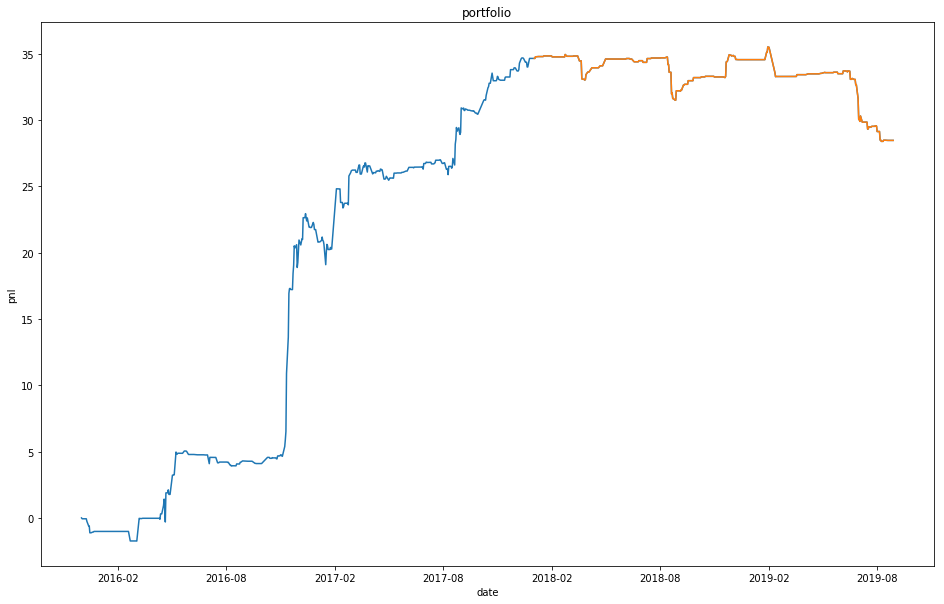

In [111]:
i = 0
strat = "adaptive.002.4096"
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
min_pnl = 2
min_num = 10
for product in product_list:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    train_std = np.std(train_pnl)
    train_pnl = train_pnl/train_std
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)/train_std
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    

# rb train sharpe  1.8346620016096344 test sharpe  0.3620529678246786
# hc train sharpe  1.1914799327135988 test sharpe  0.2840234116922066
# i train sharpe  1.1472088393155544 test sharpe  -0.972774473941334
# j train sharpe  0.2149676964893535 test sharpe  -1.65274526438415
# jm train sharpe  0.9791166525240026 test sharpe  1.0305984654602123
# train sharpe:  2.2782337682405114 test sharpe:  -1.1346524286723305






- The result is really bad

Conclusion

- we have used 4 models: lasso, ridge, elastic net, and adaptive lasso
- it seems lasso performs the best; however, j lost money for lasso
- maybe we can use all products' data together to build up models, 
- and we can try in the future